In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
pic = cv2.imread(r"R:\01-Organize\01-Management\01-Data Center\Brisk\06-AI & Machine Learning (D0340)\04-IOT_Smartfarm\picture_original_topview_smartfarm\picture_topview_12092025_131834.jpg")


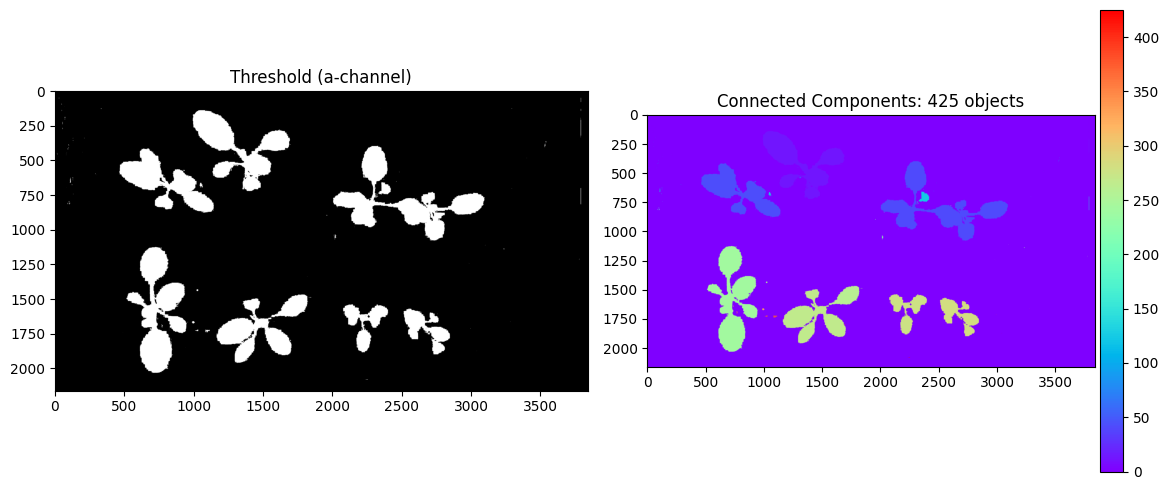

In [10]:
lab = cv2.cvtColor(pic, cv2.COLOR_BGR2LAB)
L, A, B = cv2.split(lab)

_, thresh = cv2.threshold(A, 120, 255, cv2.THRESH_BINARY_INV)  

# หาวัตถุที่ต่อเนื่อง
n, lek = cv2.connectedComponents(thresh)

# แสดงผล
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Threshold (a-channel)")
plt.imshow(thresh, cmap="gray")

plt.subplot(1,2,2)
plt.title(f"Connected Components: {n-1} objects")
plt.imshow(lek, cmap="rainbow")
plt.colorbar(pad=0.01)
plt.tight_layout()
plt.show()

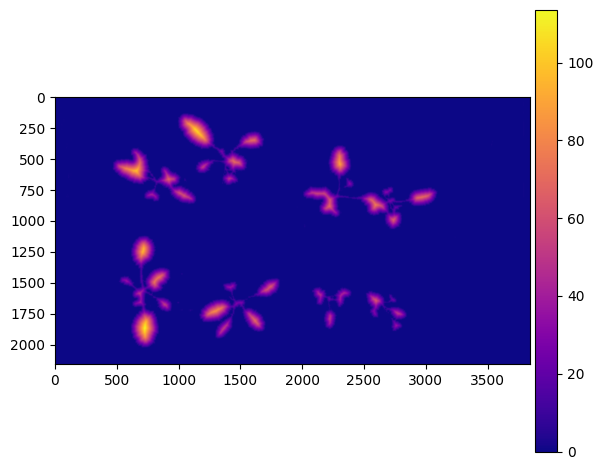

In [11]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 0)
plt.imshow(dist, cmap='plasma')
plt.colorbar(pad=0.01)
plt.tight_layout()
plt.show()

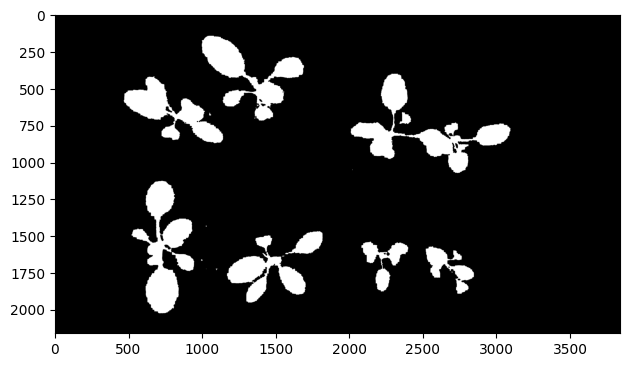

In [23]:
obj = np.where(dist>dist.max()*0.03, 1.0, 0.0)
plt.imshow(obj, cmap='gray')
plt.tight_layout()
plt.show()

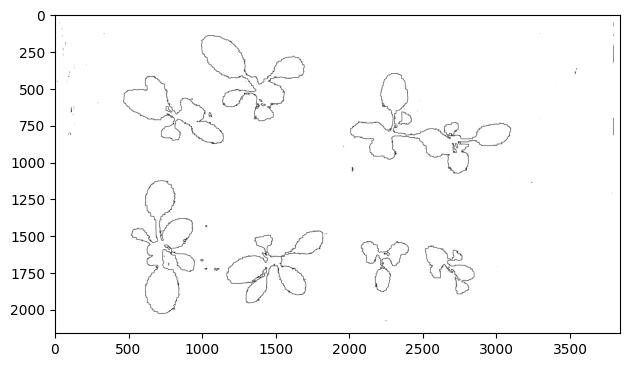

In [24]:
bg = np.where(dist==0, 1, 0)
final_bg = ((obj+bg)!= 0).astype(np.uint8)
plt.imshow(final_bg, cmap='gray')
plt.tight_layout()
plt.show()

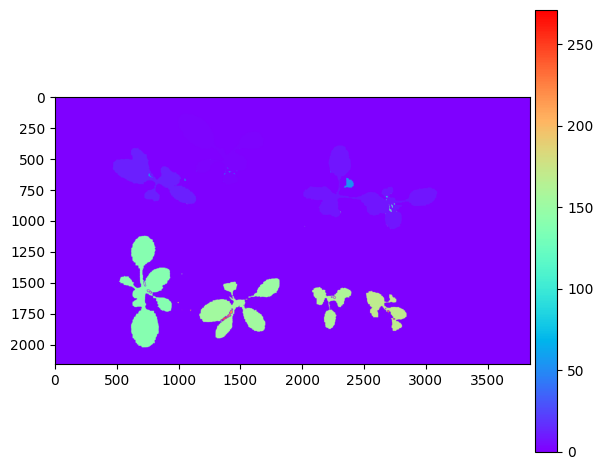

In [25]:
n, lek = cv2.connectedComponents(final_bg)
plt.imshow(lek, cmap='rainbow')
plt.colorbar(pad = 0.01)
plt.tight_layout()
plt.show()

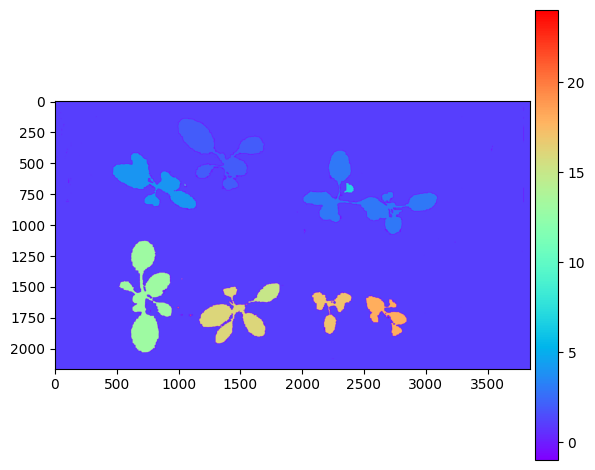

In [26]:
lek += 2
lek[bg==1] = 1
lek[final_bg==0] = -1
for i,n in enumerate(np.unique(lek)[1:],1):
    lek[lek==n] = i

plt.imshow(lek,cmap='rainbow')
plt.colorbar(pad=0.01)
plt.tight_layout()
plt.show()

In [34]:
contour = []
for i in range(2,lek.max()+1):
    c,_ = cv2.findContours((lek==i).astype(np.uint8),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    contour.append(c[0])

n_contour = len(contour)
si = plt.get_cmap('rainbow')(np.arange(n_contour)/(n_contour-1))[:,[2,1,0]]*255
for i in range(n_contour):
    pic = cv2.drawContours(pic,contour,i,si[i],2)

cv2.imwrite('miku16c09.jpg',pic)

True